In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('../Data/01-modified-data/cardiovascular_numeric_final.csv')
data = data.drop(data.columns[0], axis=1)
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,0,50,2,168,62,110,80,1,1,0,0,1,0,21.97
1,1,55,1,156,85,140,90,3,1,0,0,1,1,34.93
2,2,52,1,165,64,130,70,3,1,0,0,0,1,23.51
3,3,48,2,169,82,150,100,1,1,0,0,1,1,28.71
4,4,48,1,156,56,100,60,1,1,0,0,0,0,23.01


In [37]:
numerical_cols = ["age", "height", "weight", "ap_hi", "ap_lo", "bmi"]
X = data[numerical_cols]
Y = data['cardio']
print(X)

       age  height  weight  ap_hi  ap_lo    bmi
0       50     168      62    110     80  21.97
1       55     156      85    140     90  34.93
2       52     165      64    130     70  23.51
3       48     169      82    150    100  28.71
4       48     156      56    100     60  23.01
...    ...     ...     ...    ...    ...    ...
64801   54     172      70    130     90  23.66
64802   58     165      80    150     80  29.38
64803   53     168      76    120     80  26.93
64804   61     163      72    135     80  27.10
64805   56     170      72    120     80  24.91

[64806 rows x 6 columns]


In [4]:
from sklearn.preprocessing import StandardScaler

# Normalize the entire dataset
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

In [5]:
# K-means
from sklearn.cluster import KMeans, AgglomerativeClustering, MeanShift, Birch, DBSCAN
from scipy.spatial.distance import cdist

In [6]:
clusters_range = range(1, 11)
inertia = []
distortion = []

for k in clusters_range:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X_normalized)
    inertia.append(kmeans.inertia_)
    distortion.append(sum(np.min(cdist(X_normalized, kmeans.cluster_centers_, 'euclidean'), axis=1)) / X_normalized.shape[0])

results_df = pd.DataFrame({'Clusters': clusters_range, 'Distoration': distortion, 'Inertia': inertia})
results_df

/Users/xueningyang/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/xueningyang/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/xueningyang/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/xueningyang/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The 

,Clusters,Distoration,Inertia
0,1,2.292838,388836.000000
1,2,1.993028,291296.924742
2,3,1.857978,252154.144591
3,4,1.748951,223794.658809
4,5,1.654102,202055.604497
5,6,1.591076,186197.578470
6,7,1.530241,173906.898109
7,8,1.483570,163483.569781
8,9,1.450806,156119.165658
9,10,1.419384,149598.773806


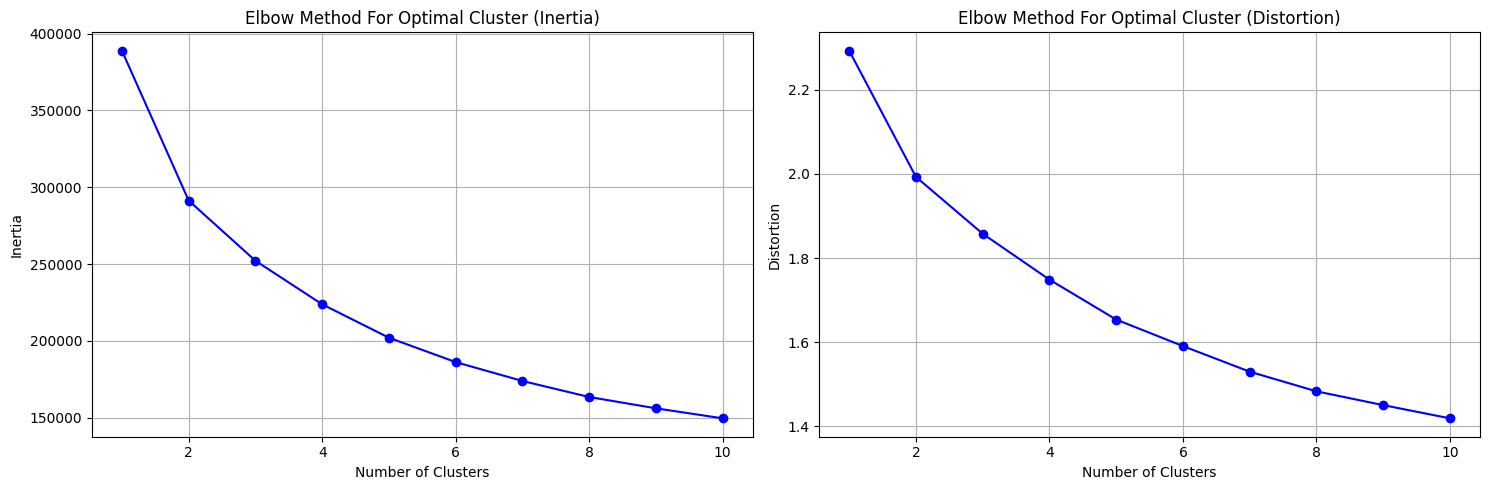

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Distortion plot
ax[1].plot(clusters_range, distortion, 'bo-')
ax[1].set_title('Elbow Method For Optimal Cluster (Distortion)')
ax[1].set_xlabel('Number of Clusters')
ax[1].set_ylabel('Distortion')
ax[1].grid(True)

# Inertia plot
ax[0].plot(clusters_range, inertia, 'bo-')
ax[0].set_title('Elbow Method For Optimal Cluster (Inertia)')
ax[0].set_xlabel('Number of Clusters')
ax[0].set_ylabel('Inertia')
ax[0].grid(True)

plt.tight_layout()
plt.show()

In [21]:
# DBSCAN
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

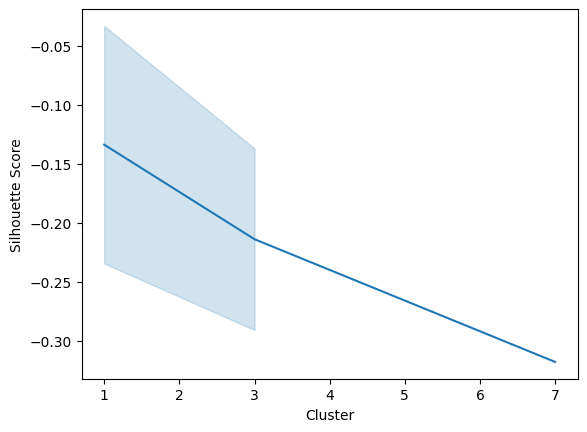

Number of clusters= 1 with best silhouette score of -0.033


In [29]:
eps_range = (0.1, 0.2,0.3,0.4,0.5)
min_samples_range = (100,1000,5000)

best_eps = 0
best_min_samples = 0
best_silhouette = -1
all_scores = []

for eps in eps_range:
    for min_samples in min_samples_range:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples).fit(X_normalized)
        labels = dbscan.labels_
        
        # Ignore noise samples (-1 label)
        if len(set(labels)) > 1 and -1 in labels:
            curr_silhouette = silhouette_score(X_normalized, labels)
            cluster_nums = len(set(labels)) - (1 if -1 in labels else 0)
            all_scores.append((eps, min_samples, curr_silhouette,cluster_nums))
            
            if curr_silhouette > best_silhouette:
                best_eps, best_min_samples, best_silhouette, cluster_num = eps, min_samples, curr_silhouette, cluster_nums

results_df = pd.DataFrame(all_scores, columns=['eps', 'min_samples', 'silhouette_score','cluster'])

sns.lineplot(x=results_df['cluster'], y=results_df['silhouette_score'])
plt.xlabel('Cluster')
plt.ylabel('Silhouette Score')
plt.show()

print(f"Number of clusters= {cluster_num} with best silhouette score of {best_silhouette:.3f}")

In [30]:
results_df #3-optimal 

,eps,min_samples,silhouette_score,cluster
0,0.2,100,-0.317742,7
1,0.3,100,-0.290760,3
2,0.4,100,-0.033415,1
3,0.5,100,-0.137065,3
4,0.5,1000,-0.234400,1


In [15]:
X_sample = X.sample(n=6000, replace=True)
# Normalize the entire dataset
scaler = StandardScaler()
X_sample_norm = scaler.fit_transform(X_sample)

In [24]:
silhouette_values= []
n_clusters =[]
linkage=[]
for i in range(2,11):
    hierarchical_model = AgglomerativeClustering(n_clusters=i, linkage='ward')
    cluster_labels = hierarchical_model.fit_predict(X_sample_norm)
    score  = silhouette_score(X_sample_norm, cluster_labels)
    silhouette_values.append(score)
    n_clusters.append(i)
    linkage.append('Euclidean')

    hierarchical_model = AgglomerativeClustering(n_clusters=i, linkage='single')
    cluster_labels = hierarchical_model.fit_predict(X_sample_norm)
    score  = silhouette_score(X_sample_norm, cluster_labels)
    silhouette_values.append(score)
    n_clusters.append(i)
    linkage.append('Manhattan')

    hierarchical_model = AgglomerativeClustering(n_clusters=i, linkage='average')
    cluster_labels = hierarchical_model.fit_predict(X_sample_norm)
    score  = silhouette_score(X_sample_norm, cluster_labels)
    silhouette_values.append(score)
    n_clusters.append(i)
    linkage.append('Cosine')

    hierarchical_model = AgglomerativeClustering(n_clusters=i, linkage='complete')
    cluster_labels = hierarchical_model.fit_predict(X_sample_norm)
    score  = silhouette_score(X_sample_norm, cluster_labels)
    silhouette_values.append(score)
    n_clusters.append(i)
    linkage.append('Correlation')


Text(0.5, 1.0, 'Hierarchical Clustering')

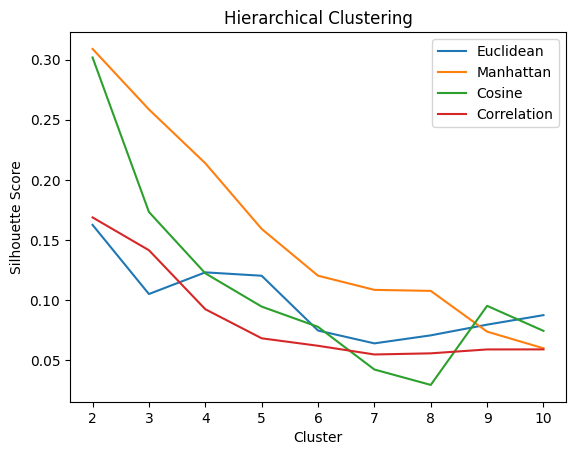

In [27]:
sns.lineplot(x=n_clusters,y=silhouette_values, hue =linkage)
plt.xlabel("Cluster")
plt.ylabel("Silhouette Score")
plt.title('Hierarchical Clustering')

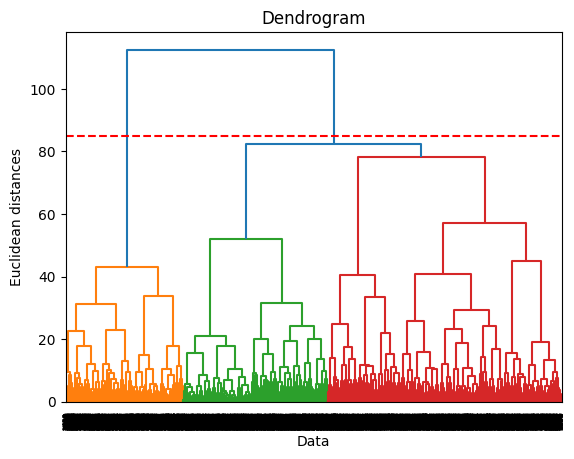

In [30]:
import scipy.cluster.hierarchy as sch

# Plotting a dendrogram
dendrogram = sch.dendrogram(sch.linkage(X_sample_norm, method='ward'))
plt.axhline(y=85, color='r', linestyle='--')
plt.title('Dendrogram')
plt.xlabel('Data')
plt.ylabel('Euclidean distances')
plt.show()



In [44]:
#Final Model

#K-means cluster = 3
kmeans = KMeans(n_clusters=3, random_state=0).fit(X_normalized)
kmeans_labels = kmeans.labels_
kmeans_s = silhouette_score(X_normalized, kmeans_labels)

#DBSCAN cluster = 3
dbscan = DBSCAN(eps=0.5, min_samples=100).fit(X_normalized)
dbscan_labels = dbscan.labels_
DBSCAN_s = silhouette_score(X_normalized, dbscan_labels)

#Hierarchical cluster = 2
labels = AgglomerativeClustering(n_clusters=2, linkage='single').fit_predict(X_sample_norm)
Hierarchical_s = silhouette_score(X_sample_norm, labels)

/Users/xueningyang/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [45]:
print(f"K-means Silhouette Score= {kmeans_s:.4f}")
print(f"DBSCAN Silhouette Score= {DBSCAN_s:.4f}")
print(f"Hierarchical Silhouette Score= {Hierarchical_s:.4f}")

K-means Silhouette Score= 0.2223
DBSCAN Silhouette Score= -0.1371
Hierarchical Silhouette Score= 0.3090


In [63]:
def plot_cluster(X,color_vector,method):
    fig, ax = plt.subplots()
    ax.scatter(X[:,3], X[:,5],c=color_vector, alpha=0.5) #, c=y
    ax.set(xlabel='ap_hi', ylabel='bmi',
    title=method)
    ax.grid()
    # fig.savefig("test.png")
    plt.show()

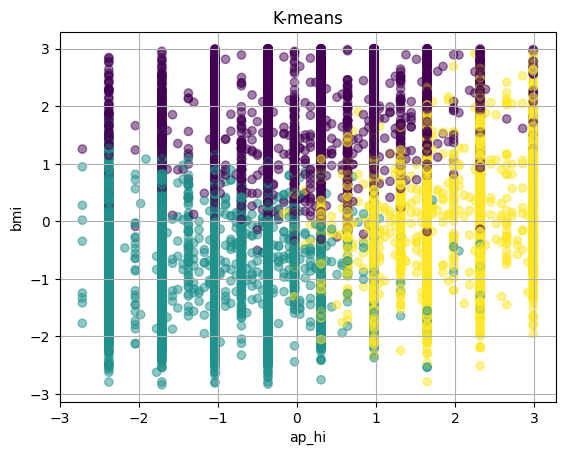

In [64]:
plot_cluster(X_normalized,kmeans_labels,'K-means')

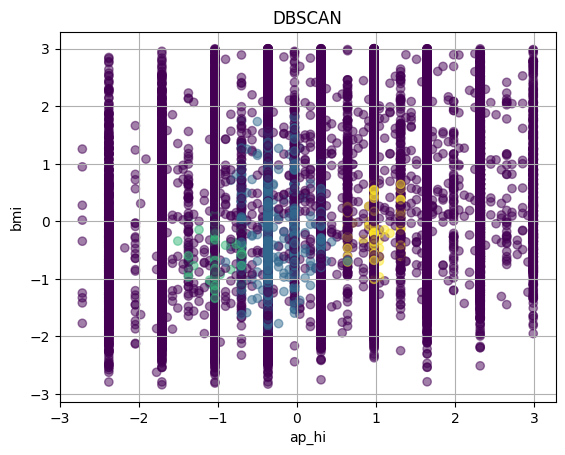

In [65]:
plot_cluster(X_normalized,dbscan_labels,'DBSCAN')
#In the DBSCAN (Density-Based Spatial Clustering of Applications with Noise) clustering model, a label of -1 signifies a noise point. Specifically, it indicates that a data point does not belong to any cluster due to insufficient neighboring points to meet the minimum density requirement (defined by min_samples and eps parameters). Essentially, these are points that are considered outliers within the dataset.

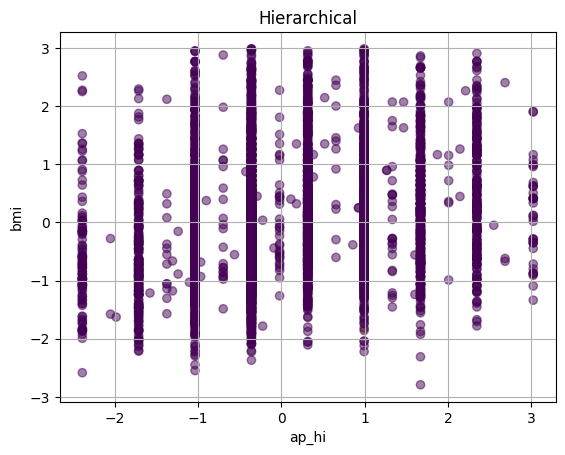

In [66]:
plot_cluster(X_sample_norm,labels,'Hierarchical')

K-means ~ optimal model

/Users/xueningyang/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 2 The average silhouette_score is : 0.2362214005967959


/Users/xueningyang/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 3 The average silhouette_score is : 0.22231647505616087


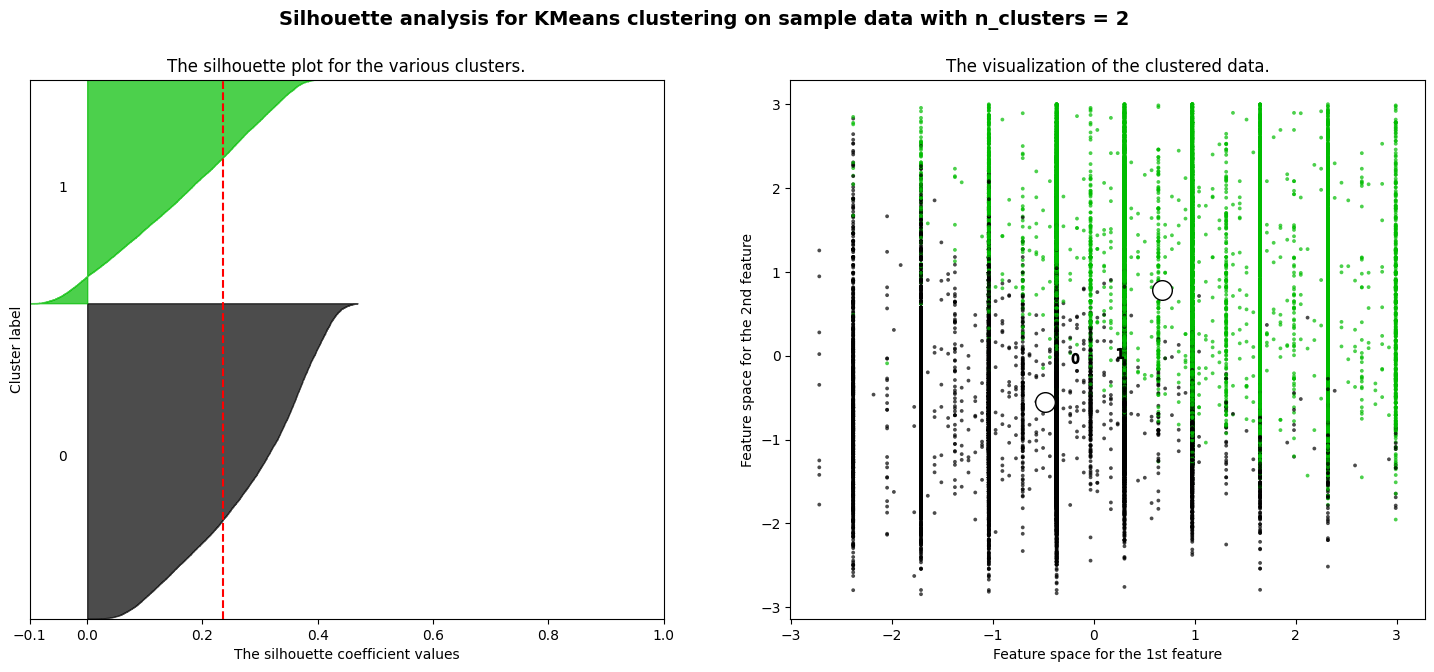

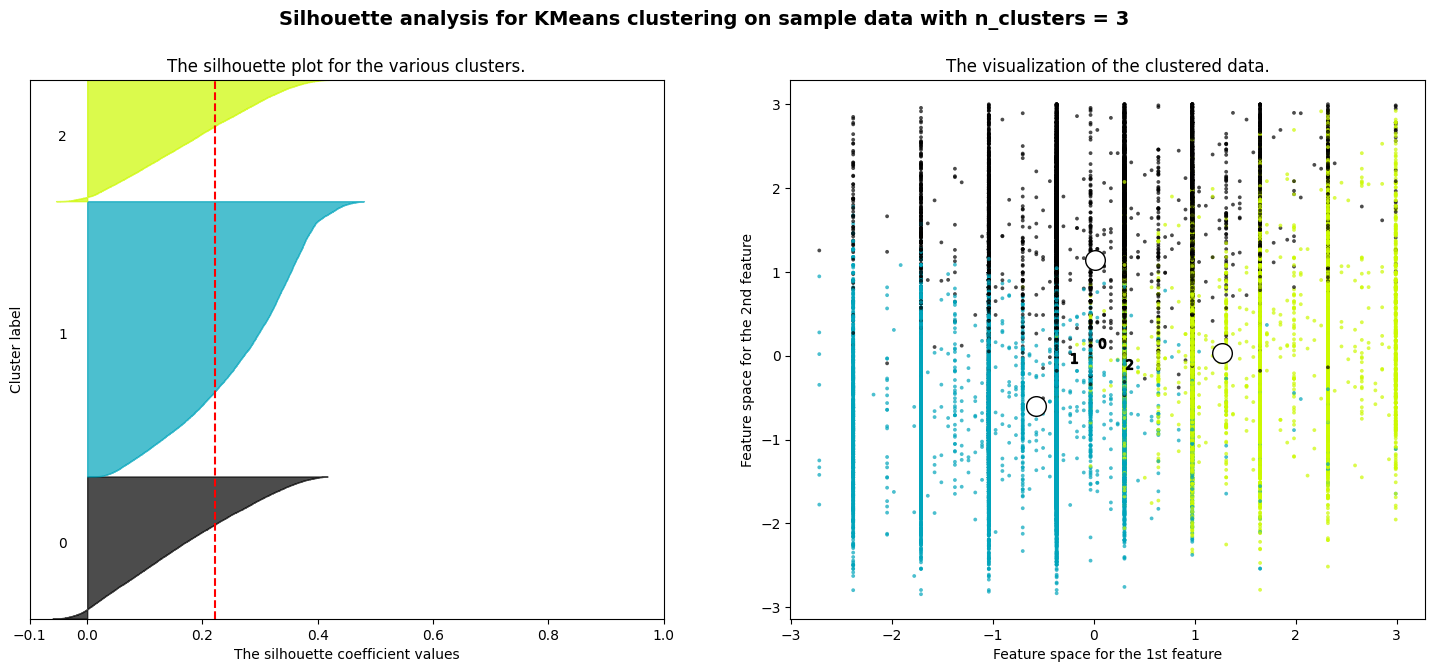

In [70]:
# SOURCE: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X = X_normalized

range_n_clusters = [2, 3]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 3], X[:, 5], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 3],
        centers[:, 5],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()